Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---


# CS110 Spring 2020 Assignment - Indexing Techniques and Data Structures.


## Overview

 In this assignment, you  will research  Counting Bloom Filters (CBFs), which are data structures that extend the standard Bloom Filters. You will design and implement in Python a set of CBFs initialized at a given false positive rate, and will need to summarize your findings in a report. A report structured has been provided for you in the form of enumerated tasks, which you should follow.
 
 ## Intended Style and Key Audience
 
Your report needs to be written in the style of a chapter from the Cormen textbook (i.e., exhibiting academic rigor and clear explanations) or a Wikipedia page on the subject (i.e., a general overview on a topic that will be peer-reviewed by the world-wide community). Thus, with a beginner’s audience in mind, your report needs to: 

* Carefully explain the concepts of a CBFs, 
* Include details on your CBFs design, 
* Perform an analysis of your implementation and experimental results pertaining to your Python implementation and 
* Perform a critical comparison analysis between the experimental results and the theoretically predicted ones. 
* Use the provided code cells to include all your code, and if these are not enough, please add more cells which you deem necessary.
* Use the same function names provided in the template. 
* Thoroughly describe the algorithmic strategies you are employing in a given question. To do so, feel free to include extra Markdown cells whenever relevant--you may find this [how-to-guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) helpful. 

Make sure you properly cite your sources of information. 

## Notes on the Submission Materials

1. Your **first resource** should be a PDF file created from the Jupyter notebook template provided in these instructions. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your **second resource** must be a single Jupyter Notebook named “Dumbledore.ipynb”. Alternatively, you can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore, the Jupyter notebook submitted as part of such zip file should still be named “Dumbledore.ipynb”!).

## Notes on the Grading Rubrics

* This is a strictly individual assignment. Everything you submit must reflect your own writing and coding. Please do refer to the course guidelines on the syllabus namely in what constitutes plagiarism. 
* All the tasks will be graded on the indicated companion LOs; please make sure to consult their descriptions and rubrics in the course syllabus to maximally align your approach to them. You will not be penalized for not attempting the optional challenge.
* As per the course’s policy on the syllabus, you will need to footnote **at least three HCs** by including a meaningful justification of the application of each HC and how they enabled you to complete part of your work on this assignment. Please refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.

## Report Structured Tasks

### Task 1. [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible: 
* your name. 
* your absences for the course have been set to excused up to the end of week 7 (inclusively). Submit this screenshot as a PNG file on your Jupyter notebook. 

In [2]:
from IPython.display import Image
Image(filename='Screen Shot 2020-03-07 at 7.02.56 PM.png')

### Task 2.  [#ComputationalSolutions, #DataStructures, #ComplexityAnalysis]  

Write a summary  of the CBFs as an indexing technique, with their underlying data structure and  hashing functionality. This is,  list all the operations they support. For all CBF operations, include an analysis of their asymptotic order growth (complexity analysis). Give a few examples of practical, real-life computational applications that can benefit from using CBFs and carefully justify why. 

Counting Bloom Filter (CBF) is a **probabilitistic data structure** that is generalized from a standard Bloom Filter (BF) and is used to test whether a count number of a certain element is smaller, equal to or bigger than the defined threshold. This count helps us identify whether the element is possibly in the list or certainly not in a list.  

In order to explain the pupose of CBF, we can start with explaining what a standad bloom filter is, given that CBF is an "upgraded version" of FB. In BF we start with a bit array (an array of 0s) of size m. We also have a certain number of hash functions that are used to calculate indices of the bits that have to be updated - this number is calculated using the formula $k = \frac{m}{n}ln2$, where m is the size of the array and n is the number of elements we want to input. When we want to insert values into the array, we run it through all hash functions and obtain the indices of the bits that will be changed from 0 to 1. Therefore, when we want to look up whether a certain value is in the array, we run it through the hash functions, obtain the indices and check the bits that correspond to those indices. If at least one of the bits is 0, we know that the value is definitely not in the array. If all of the bits are 1s we can say that the value is possibly in the array. We say "possibly" because in BF a single bit might correspond to multiple inserted values. Mistakenly saying that the element is in the array although it is not is called false-positive which is one of the major drawbacks of BF. The  false positive rate is calculated using the formula $(1 - e^{-kn/m})^{k}$ where k is the number of hash functions, n is the number of elements in the set and m is the length of the bit array. BF supports standard operations such as insertion, quiery and other custom operations, however deletion of the element is not possible, because we cannot know whether hashing an element produces the indices where 1s are located because the element is in the array, or because hasing other elements also produced these indices.

Now we can proceed to the discussion of CBF which repersent a more flexible version of BF. There are two major differences between BF and CBF: firstly, in CBF we don't have an array of bits (0s or 1s) but an array of **integers**, because we update the array slots every time the values we want to insert are hashed; secondly, we can **delete elements** from an array because we know how many elements have been hashed to every slot in the array. Therefore, in CBF whenever we insert an element, we run it through the hash functions and increment the counters under the indices we obtain by 1. To search an element, we need to run an element through the hash function and check every counter under the indices hash functions return. We need to compare the values of the counters to the threshold θ and if at least one of the counters is smaller, we can state that the element is not in the array. If all of the counters are equal to or bigger than the counters, we can state that the element is possibly in the array, because we cannot know whether the counter is really higher or equal to zero or whether it happened due to insertion of other elements (by chance). Because of this "chance" and impossibility of knowing whether the value is false positive, we say that CBFs are **probabilistic** data structures.

Operations | Time Complexity of CBF
--- | 
Search | O(k)
Insert | O(k)
Delete | O(k)

As we can see, the time complexity of every operation is O(k). This can be explained by the way we perform operations in CBR - every operation is independent of the number of elements already in the list. Most of the computational power comes from hashing the values, and then we require a simple check of whether the counters of the indices we obtain are smaller or bigger than the threshold. Because of this, the time it takes to insert, find or delete an element depends on the efficiency and number of hashing functions - k. 

The practical use of CBF comes not from their ability to tell us whether an element **is probably** in the list, but rather in quickly telling us whether the element is **definitely not** in the list. For example, when we are visitng different websites, we are targeted with advertisements and it is more efficient for the website to show different ads instead of showing the same one again and again. In this case, bloom filters are used - the website can automatically track our id, what advertisements have been shown to us and use the CBF to pick an advertisement that we have not already seen. Another example is fraud detection. Whenver we make purchases with our cards, the system is recording the places and websites where the purchases occured. When we make new purchases, CBFs help the bank identify the places that are not in the list of past purchases and mark them as suspicious.  

Overall, a huge advantage of CBFs is that they take much less space than hash tables. Because we are not storing the elements themsevles, but simply their representation in terms of indices obtained through hash functions, such characteristic becomes crucial when dealing with millions of elements. Besides, the space we use is constant, since whever we insert the elements, we simply update the counters and do not add anything to the array.

**#composition:** in my description of CBFs it was very important to deliver the information in a concise, and easy to understand way. This HC was applied well because I made sure to explain the concept of Bloom Filters first and then proceeded to Counting Bloom Filter. I also highlighted certain pieces of text to draw attention to the most important aspects of CBFs. 

### Task 3. [#DataStructures, #PythonProgramming, #CodeReadability] 

Implement in Python 3 your designed CBFs data structure and all its operations using the code template below. Make sure you carefully organize your Python code, write meaningful comments (feel free to use [docstrings](https://www.python.org/dev/peps/pep-0257/)), and provide a thorough justification for your choice of hash functions. 

If you decide to use the Python library  `mmh3`,  you will need to provide a thorough explanation of why you have chosen the hashing functions therein. You may also use  `numpy`, `matplotlib`, `random`, `statistics`, and `math`. If you plan to use any other external library not mentioned in this list, you will need to contact your instructor first for validation.

Make sure to strictly follow the honor code as any plagiarism attempt will be referred to the ASC. Please refer to [resource1](https://new.library.arizona.edu/research/citing/plagiarism) and [resource2](https://poorvucenter.yale.edu/writing/using-sources/understanding-and-avoiding-plagiarism/what-plagiarism), which specify what constitutes plagiarism. 

Demonstrate how your code works by inserting a list of words in [Shakespeare’s works](https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt). The following lines of code will create such a list of words in Python:

```python
txt_file = open("t8.shakespeare.txt", "r")

entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
```

Feel free to use another interesting dataset for further validation, but this is optional.

In [3]:
import math
import numpy as np
import urllib.request
import random
import matplotlib.pyplot as plt
import time
import statistics

In [4]:
txt_file = open("t8.shakespeare.txt", "r")

entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']

In [5]:
#the first hash function
def hash1(string):
    ans = 0
    #for every character in the string, we add a number that corresponds to this character in the Unicode system
    for chr in string:
        ans += ord(chr)
    return ans

#the second hash function
def hash2(string):
    ans = 14
    #for every character, we add the number that corresponds to this character in the Unicode system
    #but this time also raise the number to 68th power every time
    for chr in string:
        ans = ans * 68 + ord(chr)
    return ans

#this function combines the previous two 
def hash_cbf(key, num_hashes):
    ind = 0
    #depending on the optimal number of hash function, we add the first hashing function 
    #and a multiple of the second one
    #this allows us to avoid using lots of hashing functions
    for i in range(num_hashes):
        ind =+ (hash1(key) + i * hash2(key))   
    return ind

In [6]:
class CountingBloomFilter(object):
    """Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter 
    
    Feel free to define any helpful additional methods.
    """ 
    
    #initializing the object
    def __init__(self, num_item, fpr):
        #assigning the false positive rate
        self.fpr = fpr
        #assigning the numbe of items to be storerd in CBF 
        self.num_item = num_item
        #calculating the optimal size by using equation from an external source (will be introduced further)
        self.size = math.ceil((self.num_item * math.log(self.fpr)) / math.log(1 / pow(2, math.log(2))))
        #creating an array of bits (size is equal to the number we calculate in the previous line)
        self.bits = np.zeros(self.size)
        #calculating the optimal number of hash functions using the equation from an external source
        self.num_hashfn = round(1 + (self.size/self.num_item)*math.log(2))
    
    #function that inserts elements into the CBF
    def insert(self, item):
        #for every hash function, we find indices of the element  
        for i in range(self.num_hashfn):
            index = hash_cbf(item, i)%self.size  
            #and mark them with 1s
            self.bits[index] += 1
            
    #function that deletes elements from the CBF
    def delete(self, item):
        for i in range(self.num_hashfn):
            index = hash_cbf(item, i)%self.size 
            #decreasing the values of the counters of the elements that we want to delete
            self.bits[index] -= 1
            
    #function that searches an element in the array and returns True if the element is possibly in the array
    #or false if it is definitely not in the array
    def search(self, item):
        #setting the count to mark the counters with values lower than theta
        count = 0
        for i in range(self.num_hashfn):
            #finding an indices of the item and performing the mod operation to get indices within our array
            index = hash_cbf(item, i)%self.size 
            if self.bits[index] < 1:
                #mark the counters with values lower than theta
                count+= 1
        #returning true if there are any and false if there are none
        if count > 0:
            return False
        else:
            return True

To estimate the optimal number of hash functions and memory size, I used formulas from the following resource: https://www.researchgate.net/publication/224230450_Theory_and_Practice_of_Bloom_Filters_for_Distributed_Systems.
These formulas were derived from the formula that estimates the false positive rate and therefore allow us to choose the false positive result of our choice to obtain and create a CBF of an optimal size. 

**#testability:** this HC was very important in this assignment as I previously did not have any experience with CBS and not a lot of experience with object oriented programming. Therefore, I created smaller datasets, tried to predict what my code is supposed to produce and iterated this process until I obtain the results I expect. This technique allowed me to understand the code better and make it work as expected.

**#breakitdown:** this HC was helpful when I was writing the CBF code. I decided to break the concept of CBF down into smaller subtopics and analyze them separately. This was very effective as by separating a new topic into more tractable questions, I could understand them better and draw connections and causal links between them. For example, when reading about the practical implementation of CBFs, there was a great description of the risks of high false positive rate which strengthened by understanding of the drawbacks of the data structure which is a different subtopic.

### Task 4 [#ComplexityAnalysis, #ComputationalCritique].

Now you will verify the effectiveness of your CBF implementation by testing how well the implementation matches or diverges from the theoretical findings. The following tasks will help you make this computational analysis. Explicitly include any assumptions you have made to arrive at your results. If there are any discrepancies between the theory and the computational experiments, provide an explanation for these.

1. [#DataStructures] Create several CBFs (at least 10) for different FPRs, and evaluate how the memory size scales with the FPR. 
2. [#DataStructures] How does the memory size scale with the number of items stored, for a fixed FPR?
3. [#DataStructures, #ComplexityAnalysis] How does the actual FPR scale with the number of hash functions?
4. [#DataStructures, #ComplexityAnalysis] How does the access time to hashed values scale with the number of items stored in a CBF kept at constant FPR?


**Assumption**  
In the previous codes, I have used the formulas that are originally used for the simple Bloom Filters. However, because Counting Bloom Filters are generalized from Bloom Filters adn their functionality is very similar, we assume that the formulas serve as a good approximation and can be used for further tasks.

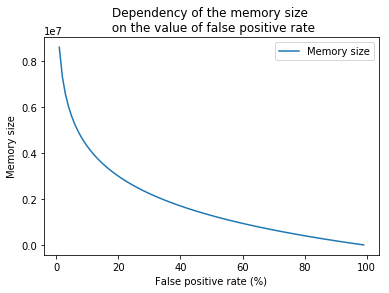

In [7]:
#1 
#creating an empty list to storre memory sizes
memory_list = []
#for every percent of the false negative rate, we check the optimal amount of memory needed and append it to the list
for i in range(1,100):
    bloom = CountingBloomFilter(896183,float(i/100))
    memory_list.append(bloom.size)

#plotting the graph
x = list(range(1,100))
plt.plot(x,memory_list,label = "Memory size")
plt.title("Dependency of the memory size \n on the value of false positive rate")
plt.ylabel("Memory size")
plt.xlabel("False positive rate (%)")
plt.legend(loc="upper right")

Here we can see that as the value of false positive rate is increasing, the amount of memory needed is decreasing which makes intuitive sense. In CBF, the more memory we have, the more slots we have for the counters to mark different values. If there are a lot of counters, there is less chance that the counters will overlap for different values which decreases the false positive rate. Conversely, if we do not care about the false positive rate, we can create an array with a very small memory size and multiple values will share the same counters, so when we search for the items, there is a much bigger chance that we will encounter the slots that have being updated due to insertion of other values.

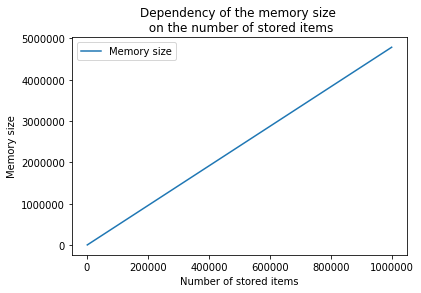

In [8]:
#2
#creating an empty list
memory_list = []
#but this time we change the inout sizes and keep the false positive rate constant
for i in range(1000,1000000, 1000):
    bloom = CountingBloomFilter(i,0.1)
    memory_list.append(bloom.size)

#plotting the graph
x = list(range(1000,1000000, 1000))
plt.plot(x,memory_list,label = "Memory size")
plt.title("Dependency of the memory size \n on the number of stored items")
plt.ylabel("Memory size")
plt.xlabel("Number of stored items")
plt.legend(loc="upper left")

As for this plot, we can see that the memory size is directly proportional to the number of items we want to store. To calculate the memory size needed given the false positive rate and the input number, we used formula introduced in the following source: https://www.researchgate.net/publication/224230450_Theory_and_Practice_of_Bloom_Filters_for_Distributed_Systems. As we can see, the input size, n, is in the numerator of the equation, so it is not surpring that the memory size is linearly dependent on the the number of stored items. Intiutively, it makes sense too, because with more values to store, we need more space to keep the false positive rate small.

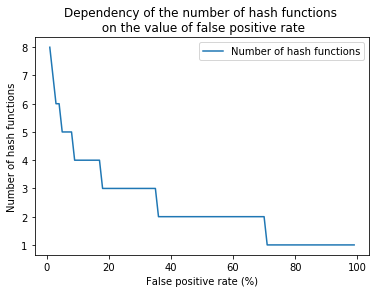

In [9]:
#3
#creating an empty list
hash_list = []
#for every percent of the false positive rate and constant input size, we find the optimal # of hash functions
for i in range(1,100):
    bloom = CountingBloomFilter(896183,float(i/100))
    hash_list.append(bloom.num_hashfn)

#plotting the graph
x = list(range(1,100))
plt.plot(x,hash_list,label = "Number of hash functions")
plt.title("Dependency of the number of hash functions \n on the value of false positive rate")
plt.ylabel("Number of hash functions")
plt.xlabel("False positive rate (%)")
plt.legend(loc="upper right")

This result is not surprising as well. When we increase the false positive rate, we also decrease the memorry size which is needed to store the values. As we have alrerady mentioned, to calculate the optimal number of hash functions, we use the following formula: $k = \frac{m}{n}ln2$. As we can see, the memory size (m) is in the numerator of the equation, so as it decreases, the optimal number of hash function has to decrease too. The graph demonstrates this well.

In [10]:
#4
#creating an empty list
times_list = []
#for here we want to iterate through numbers like 1000,2000,3000, and so on...
for i in range(1000, 200000, 1000):
    #we create a new CBF with a constant false positive rate
    bloom = CountingBloomFilter(i, 0.1)
    #and insert the first i values form the Shakespeare's texts into the CBF
    for k in all_text[0:i]:
        bloom.insert(k)
    #here we create an empty list for the test words
    test_words = []
    random.seed(346)
    #and append 100 random words from the first i values form the Shakespeare's texts into the test words list
    for l in range(100):
        test_words.append(random.choice(all_text[0:i]))
    #here we create an empty list for the averages
    averages = []
    #and record the time it takes to find each words in the CBF
    for m in test_words:
        a = time.time()
        bloom.search(m)
        b = time.time()
        #and take the avereage of 100 look-ups
        averages.append(b-a)
    #then we find an average of these 100 look-ups
    times_list.append(statistics.mean(averages))

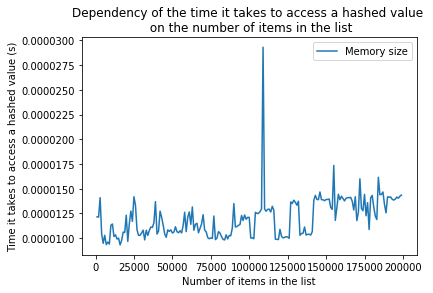

In [11]:
#plotting the graph
x = list(range(1000, 200000, 1000))
plt.plot(x,times_list,label = "Memory size")
plt.title("Dependency of the time it takes to access a hashed value \n on the number of items in the list")
plt.ylabel("Time it takes to access a hashed value (s)")
plt.xlabel("Number of items in the list")
plt.legend(loc="upper right")

This graph neeeds careful examination as at first glance, it might seem that there is a very strong variation between the time it takes to access the values and the number of items in the list. However, if we take a close look at the y-axis, we can see that the difference range of values there is very small - around $~2* 10^{-5} seconds$. As we can see, the times changes within this range, however, does not leave it. Given the theoretical prediction that the time complexity of looking the values up is O(k) provides evidence to the idea of treating O(k) as O(1), because as we can see, in the range of input size (0 to 200000) the look up time did not change meaning that go asymptotic growth has happened. 

### Task 5. [#ComputationalCritique]

Identify and list (if any) corner cases for CBFs. Explain why these cases should be taken into account if you are a software engineer.


After researching multiple articles devoted to BFs and CBFs, I arrived at a conclusion that there are not explicit corner cases for CBFs. It is important to understand the limitations of CBFs and use them for the tasks where they would be the most efficient. For instance, if we decided to use CBF to store the social security numbers of the US citizens, and our main goal was identification whether the person is a US citizen, we would run into a problem, because of the potential false positive results. If this can be called a corner case for CBFs, then we can say that using CBFs for the tasks they are not created for is the main corner case (for example, looking up values in the list, or storing some super inportant information which we will need to access). Therefore, if I was a software engineer I would firstly analyze the problem I have and then critically asses whether whether CBF is optimal for a given problem.

**References**  
Tarkoma, S., Rothenberg, C. E., & Lagerspetz, E. (2012). Theory and Practice of Bloom Filters for Distributed Systems. IEEE Communications Surveys & Tutorials, 14(1), 131–155. doi: 10.1109/surv.2011.031611.00024